# Problématique

Il s'agit d'un problème d'analyse de sentiment soit un problème de classification. On a récupéré un fichier run.py permettant de récupérer les prédictions du modèle, le fichier sentiment_pipe.joblib et un dataset. Mais il faudrait analyser le modèle et les données pour comprendre la démarche de notre prédécesseur et voir les actions possibles.

## Analyse des données

Les données utilisées pour l'entrainement sont des commentaires de restaurants avec 2 types de sentiments : Positif / Négatif.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/comments_train.csv")
df.head()

,comment,sentiment
0,J'ai réservé ma table quelques mois à l'avance...,Positive
1,Que dire... Nicolas sale est un chef d excepti...,Positive
2,Dans une rue tranquille non loin du Panthéon u...,Positive
3,Rien à redire le restaurant est irréprochablem...,Positive
4,Comme avec les autres commentaires nos repas é...,Positive


In [7]:
df.count()

comment      1617
sentiment    1617
dtype: int64

In [5]:
df.describe()

,comment,sentiment
count,1617,1617
unique,1534,2
top,Je suis en couple avec une japonaise depuis 20...,Positive
freq,5,1019


In [8]:
df.isna().sum()

comment      0
sentiment    0
dtype: int64

In [9]:
df.sentiment.unique()

array(['Positive', 'Negative'], dtype=object)

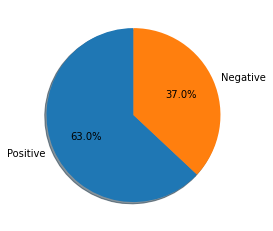

In [32]:
labels = 'Positive', 'Negative'

plt.pie(df.sentiment.value_counts(normalize = True), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.show()

Les classes sont légèrement déséquilibrées. Peut-être à prendre en compte lors de l'entraînement du modèle ?

## Chargement du modèle

In [6]:
model = joblib.load("models/sentiment_pipe.joblib")
model

/Users/nohossat/.local/share/virtualenvs/youtube_sentiment_analysis-bsovMP99/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/nohossat/.local/share/virtualenvs/youtube_sentiment_analysis-bsovMP99/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/nohossat/.local/share/virtualenvs/youtube_sentiment_analysis-bsovMP99/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator SVC from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/nohossat/.local/share/virtualenvs/y

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma=0.001))])

On a un pipeline Scikit Learn avec 2 étapes : un TF-IDF avec les arguments par défaut du vectorizer et un SVM avec le coefficient C à 1000 et le gamma à 0.001. 

## Nettoyage des données

Il s'agit d'un problème de NLP mais dans le pipeline, on ne constate pas de phase de nettoyage particulière (pas de suppression des lignes vides, pas de retrait des stops words, pas de stemming / lemmatisation).

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [ ]:
model.score(X_test, y_test)